Non Linear Regression Analysis

If the data shows curvy trend, then linear regression will not produce very accurate results when compared to non linear regression because, as the name implies,linear regression presumes that the data is linear.Let's learn about non-linear regressions and apply an example on python.In this notebook, we fit a non linear model to the data points that corresponding to China's GDP from 1960 to 2014.

Importing required libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Though Linear regression is very good to solve many problems,it can not be used for all datasets.First recall how linear regression,
could model a dataset.It models a linear relation between a dependent variable y and independent variable x.It had a simple equation,
of degree 1 for example y = 2x + 3

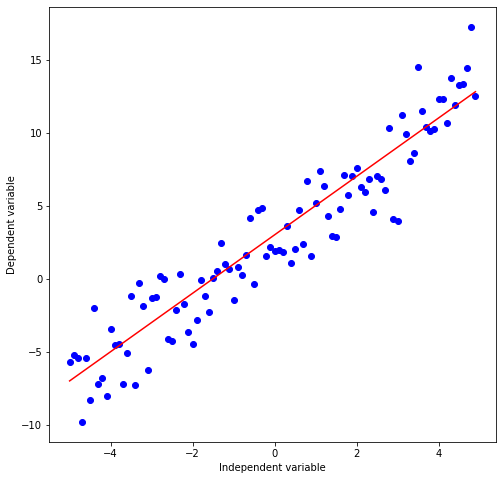

In [14]:
x = np.arange(-5.0,5.0,0.1)
y = 2 * x + 3
y_noise =  2 * np.random.normal(size = x.size)
y_data = y + y_noise
plt.figure(figsize=(8,8))
plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.show()



Non-linear regressions are a relationship between independent variables x and a dependent variable y which result in a non linear function modeled 
data.Essentially any relationship that is not linear can termed as non-linear and is usually represented by the polynomila of k degrees(maximum power of x).
$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials,logarithms,fractions,and others.For example: $$ \ y = \log(x)$$

or even,more complicated such as :
$$ y = \log(a x^3 + b x^ 2 + c x + d \ $$


Let's take a look at cubic function's graph

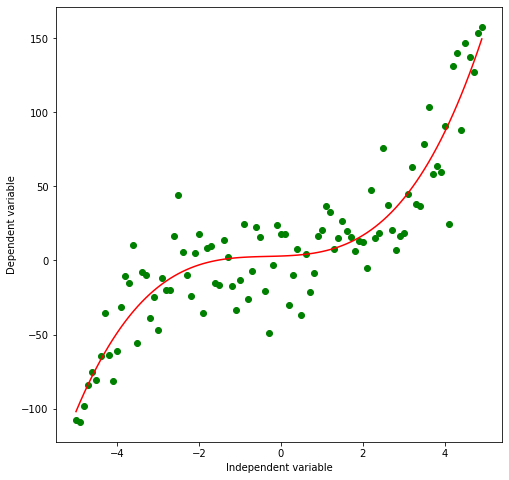

In [15]:
x = np.arange(-5.0,5.0,0.1)
y = 1 * (x ** 3) + 1 * (x ** 2) + 1 * x + 3
y_noise = 20 * np.random.normal(size = x.size)
y_data = y + y_noise
plt.figure(figsize=(8,8))
plt.scatter(x,y_data,color = 'green')
plt.plot(x,y,'r')
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.show()

As you can see this function has $x^3$ and $x^2$ as indenpendent variables.Also the graphic of this function is not a straight line over the 2D
plane.So this is a non-linear function.

Some of the other types of non linear functions are

Quadratic

$$ y = x ^ 2 $$

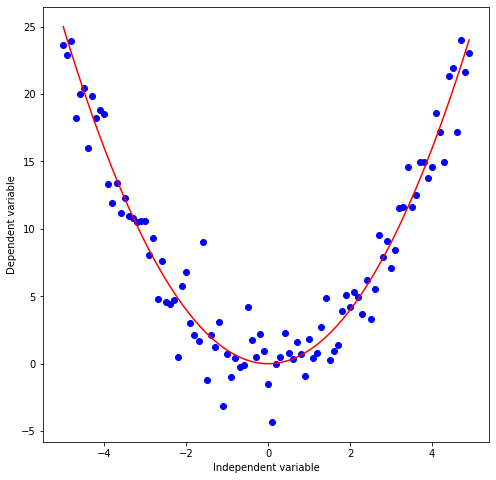

In [16]:
x = np.arange(-5.0,5.0,0.1)
y = np.power(x,2)
y_noise = 2 * np.random.normal(size = x.size)

y_data = y + y_noise
plt.figure(figsize=(8,8))
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

plt.plot(x,y_data,'bo')
plt.plot(x,y,'r')
plt.show()


Exponential

An exponential function with base C is defined by

$$ y = a + b c ^ x $$

Where b is not equal to zero, c is greater than zero, c is not equal to 1  and x is any real number.The base c is constant and the exponent x is a varaible. 

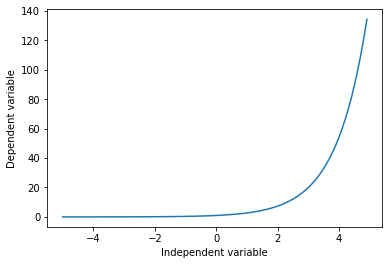

In [17]:
X = np.arange(-5.0,5.0,0.1)
Y = np.exp(X)
plt.plot(X,Y)
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()


Logarithmic

The response y is a result of applying logarthmic map from input x's to output variable y.It is one of the simplest form log().i.e

$$ y = log(x) $$

Please consider that instead of x, we can use X, which can be polynomial representation of the x's.In general form it would be written as 

$$ y = log(X) $$

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


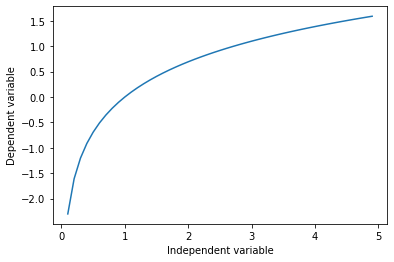

In [18]:
X = np.arange(-5.0,5.0,0.1)
Y = np.log(X)
plt.plot(X,Y)
plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")
plt.show()

​
Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


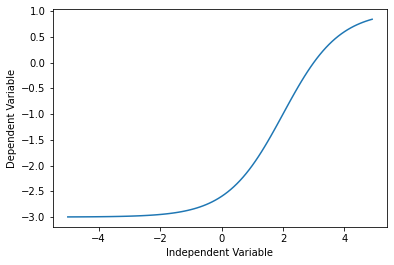

In [19]:
X = np.arange(-5.0,5.0,0.1)
Y = 1 - 4 / (1 + np.power(3,X - 2))
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Non-Linear Regression exammple

For an example, we are going to try and fit a non-linear model to the datapoints corresponding to the China's GDP from 1960 to 2014.We download a dataset 
with two columns,the first year between 1960 and 2014,the second, China's corresponding annul domestic income in US dollorsfor that year

In [20]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv

df = pd.read_csv("china_gdp.csv")
df.head(10)

2021-03-25 15:27:24 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Plotting the dataset

This is what datapoints looks like.It kind of looks of an either logistic or exponential function.the growth starts off slow,then from 2005 on forward
the growth is very siginificant.And finally it decelrates slightly in 2010's

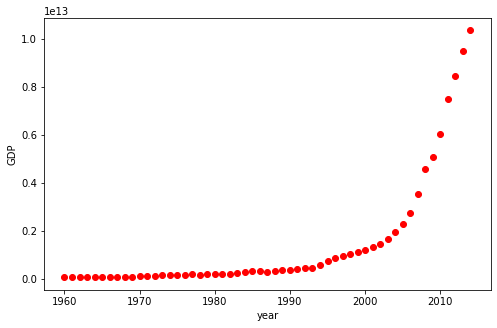

In [21]:
plt.figure(figsize = (8,5))
x_data,y_data = (df["Year"].values,df["Value"].values)
plt.plot(x_data,y_data,'ro')
plt.xlabel("year")
plt.ylabel("GDP")
plt.show()

Choosing a model

From an initial look at the plot,we determine that the logistic function could be a good approximation, since it has the property of starting
starting growth,increasing the growth in the middle, and decreasing again at the end;as illustrated below.

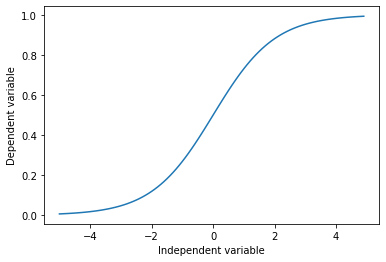

In [22]:
X = np.arange(-5.0,5.0,0.1)
Y = 1.0 / (1 + np.exp(-X))
plt.plot(X,Y)
plt.ylabel("Dependent variable")
plt.xlabel('Independent variable')
plt.show()


The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

Building the model

now,let's build our regression model and initialize its parameters

In [23]:
def sigmoid(x,beta_1,beta_2):
    y = 1 / (1 + np.exp(-beta_1 * (x - beta_2)))
    return y
    

Let us look at the sample sigmoid line that might fit with the data


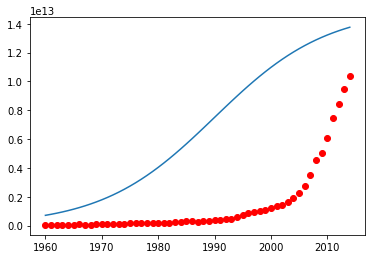

In [27]:
beta_1 = 0.10
beta_2 = 1990.0

# Logistic function 
y_pred = sigmoid(x_data,beta_1,beta_2)

# plot initial prediction against the datapoints
plt.plot(x_data, y_pred * 15000000000000 )
plt.plot(x_data,y_data,'ro')

